# Make School 2017 Summer Feedback Analysis

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [510]:
PATH = "./Student Feedback Surveys-Superview.csv"

df = pd.read_csv(PATH)

In [511]:
print(list(df))
print(len(df))

['ID', 'Location', 'Track', 'Week', 'Rating (Num)', 'Schedule Pacing']
1453


In [512]:
str(df.Track.unique())

"['Apps, Explorer' 'Apps' 'Games' nan 'VR' 'Games, Explorer']"

In [513]:
str(df.Location.unique())


"['San Francisco' 'Los Angeles' nan 'New York City' 'Redwood City'\n 'Santa Clara' 'Oakland' 'Washington DC' 'Chicago' 'Atlanta' 'Hong Kong'\n 'Beijing' 'Tokyo']"

## Cleaning

In [605]:
df = df.rename(columns={"Rating (Num)": "Rating"})
df = df.rename(columns={"Schedule Pacing": "Pacing"})
df = df[df.Rating != "#ERROR!"]
df = df.dropna()

## Data

#### Mean

In [619]:
ratings = df['Rating'].values
s_rating = 0
for i in ratings: 
    s_rating += int(i)
    
mean_rating = s_rating / len(ratings)
print(mean_rating)

8.431009957325747


#### Ratings histogram

In [516]:
ratings_hist = dict()
for i in ratings:
    try:
        ratings_hist[int(i)] += 1
    except:
        ratings_hist[int(i)] = 1
print(ratings_hist)

{3: 8, 4: 11, 5: 33, 6: 56, 7: 167, 8: 387, 9: 376, 10: 363, 1: 2, 2: 2, 0: 1}


#### NPS score

In [517]:
detractors = 0
passives = 0
promoters = 0

for i in ratings_hist.keys():
    if i < 7:
        detractors += ratings_hist[i]
    elif i >= 7 and i <= 8:
        passives += ratings_hist[i]
    if i > 8:
        promoters += ratings_hist[i]

NPS = (promoters - detractors) / len(ratings) * 100
print("There were {} more promoters than detractors in the 2017 summer academy responses".format(promoters - detractors))
print("passive response: {}".format(passives))
print("NPS = {}% = (( {} - {} ) / {}) * 100".format(round(NPS, 2), promoters, detractors, len(ratings)))


There were 626 more promoters than detractors in the 2017 summer academy responses
passive response: 554
NPS = 44.52% = (( 739 - 113 ) / 1406) * 100


## Visualizations

### Ratings histogram

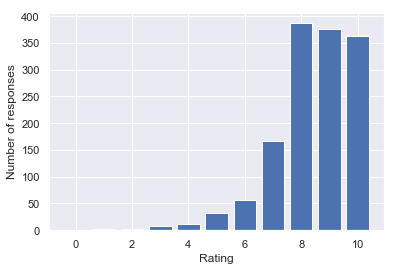

In [518]:
plt.bar(*zip(*sorted(ratings_hist.items())))
plt.ylabel("Number of responses")
plt.xlabel("Rating")
plt.show()

### Promoter to detractor per track (ratio)

In [519]:
def track_promoters_to_detractors():
    result = dict()
    for track in df.Track.unique():
        detractors = 0
        promoters = 0
        
        for i in df[df['Track'] == track]['Rating'].values:
            if int(i) > 8:
                promoters += 1
            elif int(i) < 7:
                detractors += 1

        if detractors == 0:
            result[track] = promoters / 1
        else:
            result[track] = promoters / detractors
            
    return result
        
track_pd_ratio = track_promoters_to_detractors()

{'Apps, Explorer': 3.7916666666666665, 'Apps': 5.615384615384615, 'Games': 14.777777777777779, 'VR': 23.0, 'Games, Explorer': 31.0}


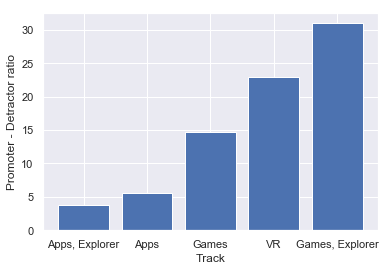

The Games Explorer track had the highest promoter to detractor ratio


In [520]:
sns.set()
plt.bar(track_pd_ratio.keys(), track_pd_ratio.values())
plt.ylabel("Promoter - Detractor ratio")
plt.xlabel("Track")
plt.show()
print("The Games Explorer track had the highest promoter to detractor ratio")

### Student experience as the academy progresses (average)

In [521]:
week_series = dict()
for week in df.Week.unique():
    mean = df[df['Week'] == week]['Rating'].values.astype(int).mean() 
    week_series[week] = mean
print(week_series)

{'Week 1': 8.264492753623188, 'Week 7': 8.61344537815126, 'Week 2': 8.409961685823754, 'Week 3': 8.540772532188841, 'Week 4': 8.328042328042327, 'Week 5': 8.448863636363637, 'Week 6': 8.531468531468532, 'Week 8': 9.11111111111111}


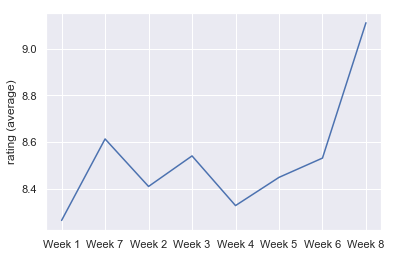

In [522]:
plt.plot(week_series.keys(), week_series.values())
plt.ylabel('rating (average)')
plt.show()

### Student experience by location (average)

In [636]:
location_series = dict()
for location in df.Location.unique():
    mean = df[df['Location'] == location]['Rating'].values.astype(int).mean()
    location_series[location] = mean

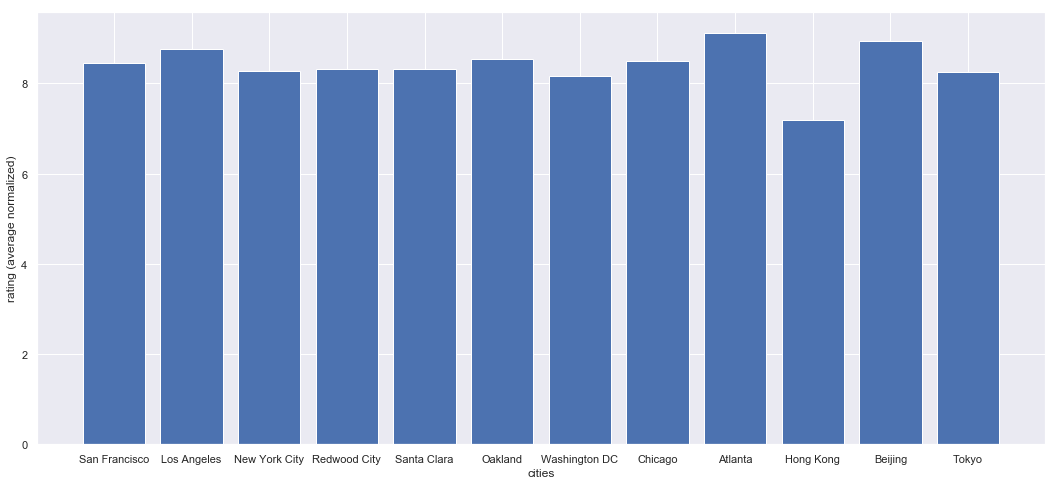

In [634]:
fig = plt.figure(figsize=(14,6))
axes= fig.add_axes([0.1,0.1,1.0,1.0])
axes.bar(location_series.keys(), location_series.values())
plt.xlabel("cities")
plt.ylabel("rating (average normalized)")
plt.show()

### What did the detractors think about the pace?

In [637]:
pacing_series = collections.Counter()
d_pacing = df[df['Rating'].astype(int) < 7]['Pacing'].values
for pace in d_pacing:
    pacing_series[pace] += 1

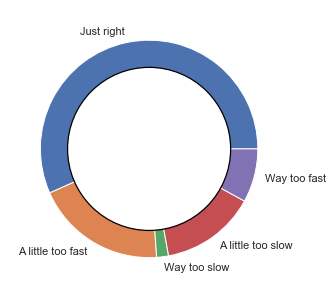

In [530]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.pie(pacing_series.values(), labels=df.Pacing.unique())
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### Detractor rating spread

In [638]:
d_ratings = df[df['Rating'].astype(int) < 7]['Rating'].values.astype(int)
d_ratings_series = collections.Counter()
for i in d_ratings:
    d_ratings_series[int(i)] += 1

<function matplotlib.pyplot.show(*args, **kw)>

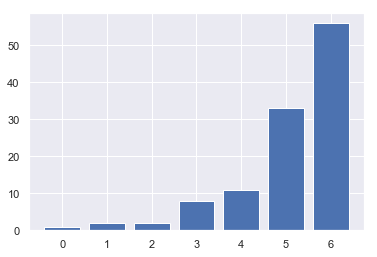

In [576]:
LABELS = ["1","2","3","4","5","6"]
fig, axs = plt.subplots()
axs.bar(d_ratings_series.keys(), d_ratings_series.values())
plt.show